# Multi-sites

author: steeve.laquitaine@epfl.ch  
last modified: 17.07.2024
status: up-to-date

execution time: 10 secs.

* 50 sites (sites in cortex) are shown as for other neuropixels experiments

## Setup

create and activate env from `spikebias..`

In [22]:
# listen to changes
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import spikeinterface as si
import yaml 

# set project path
#PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
PROJ_PATH = "/home/steeve/steeve/epfl/code/spikebias"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config

# SETUP PARAMETERS

# silico
# data_conf, param_conf_sili = get_config(
#     "silico_neuropixels", "npx_spont"
# ).values()
#PREPRO_PATH = data_conf["preprocessing"]["full"]["output"]["trace_file_path"]

SAMPFREQ = 40000  # hz

# figure parameters
SAVE_FIG = False
SAVE_FIG_DATA = False
LOAD_FIG_DATA = True

with open("./conf/figures.yml", "r", encoding="utf-8") as yaml_file:
    fig_data_paths = yaml.load(yaml_file, Loader=yaml.FullLoader)

NUM = 1444  # 1425  # 1421 # 1414  # 1409  # 1400, 76, 1200, 10, 14, 46, 53, 61, 500,
DURATION = 10  # 20  # in ms, 46
PLOT_Y_PITCH = 20
n_timepoints = int(DURATION * SAMPFREQ / 1000)
PERIOD = np.arange((NUM - 1) * n_timepoints, NUM * n_timepoints, 1)
Y_MAX = PLOT_Y_PITCH * 95


# FIGURE SETTINGS
#FIGSIZE = (1.05, 2.10)
FIGSIZE = (1.3, 5.9)
# colors
COLOR_S = [0.9, 0.14, 0.15]
LINEWIDTH = 0.5
LINEWIDTH_BORD = 0.25
# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6  # 5-7 with Nature neuroscience as reference
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 0.5  # 1
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["xtick.minor.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["ytick.major.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["ytick.minor.width"] = 0.5  # 0.8 #* 1.3
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1
# legend
savefig_cfg = {"transparent": True, "dpi": 300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False  # no legend frame

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load dataset

In [4]:
print(SAVE_FIG_DATA)

False


In [12]:
if SAVE_FIG_DATA:
        
    # get preprocessed
    Recording = si.load_extractor(PREPRO_PATH)

    # get layer metadata
    layers = Recording.get_property("layers")

    prep_traces = Recording.get_traces()
    n_contacts = prep_traces.shape[1]
    
    # save figure data
    fig_data = {
        "trace": prep_traces[PERIOD, :],
        "layers": layers
    }
    # save figure data
    np.save(fig_data_paths["fig2h_spacetime_sili_npx"], fig_data)
elif LOAD_FIG_DATA:
    fig_data = np.load(fig_data_paths["fig2h_spacetime_sili_npx"], allow_pickle=True).item()

In [16]:
# get column one sites per layer
col1_site_out = np.where(fig_data["layers"][:96] == "Outside")[0]
col1_site_l1 = np.where(fig_data["layers"][:96] == "L1")[0]
col1_site_l2_3 = np.where((fig_data["layers"][:96] == "L2") | (fig_data["layers"][:96] == "L3"))[0]
col1_site_l4 = np.where(fig_data["layers"][:96] == "L4")[0]
col1_site_l5 = np.where(fig_data["layers"][:96] == "L5")[0]
col1_site_l6 = np.where(fig_data["layers"][:96] == "L6")[0]

# find common ylim to set all voltage traces to
ymax = fig_data["trace"][:, np.hstack([col1_site_l1, col1_site_l2_3, col1_site_l4, col1_site_l5, col1_site_l6])].max()
ymin = fig_data["trace"][:, np.hstack([col1_site_l1, col1_site_l2_3, col1_site_l4, col1_site_l5, col1_site_l6])].min()
print(ymax, ymin)

ylim = [-49, 20]

20 -49


### Plot

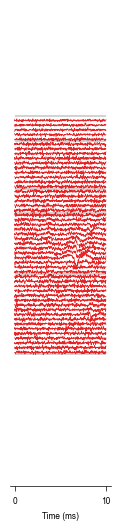

In [17]:
# plot (0: bottom 96:top)
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)
pos_up = 0
row = 0

save_trace_data = []

for contact_i in np.arange(0, 96, 1):

    # mark the first trace of each layer
    # layer 6
    if contact_i == col1_site_l6[0]:
        ax.hlines(
            y=0.98 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )

    # layer 5
    if contact_i == col1_site_l5[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )

    # layer 4
    if contact_i == col1_site_l4[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )

    # layer 2/3
    if contact_i == col1_site_l2_3[0]:
        ax.hlines(
            y=0.99 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )

    # layer 1
    if contact_i == col1_site_l1[0]:
        ax.hlines(
            y=0.98 * pos_up,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )

    # Outside
    if contact_i == 73:
        ax.hlines(
            y=pos_up, xmin=0, xmax=n_timepoints, color="black", linewidth=LINEWIDTH_BORD
        )

    # do not plot sites outside the cortex
    if contact_i in col1_site_out:
        pass

    # all other traces
    else:
        ax.plot(
            fig_data["trace"][:, contact_i] + pos_up,
            linewidth=LINEWIDTH,
            color=COLOR_S,
        )
        # record plotted traces
        save_trace_data.append(fig_data["trace"][:, contact_i])

    pos_up += PLOT_Y_PITCH

# legend
ax.spines[["left", "right", "top"]].set_visible(False)
ax.set_xticks([0, n_timepoints])
ax.set_xticklabels([0, DURATION])
ax.set_xlabel("Time (ms)")
ax.set_ylim([-10, Y_MAX + 10])
plt.yticks([])

# disconnect axes (R style)
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("right")

# # save figures
# if SAVE_FIG:
#     plt.savefig(
#         "figures/0_validation/2_dynamics/fig2b_spacetime_sili_npx.svg", **savefig_cfg
#     )

number of sites shown: 50


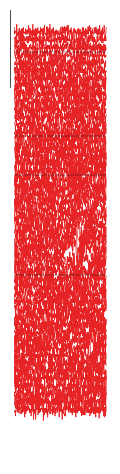

In [21]:
# setup plot
n_sites = len(col1_site_l1) + len(col1_site_l2_3) + len(col1_site_l4) + len(col1_site_l5) + len(col1_site_l6)

fig, ax = plt.subplots(n_sites, 1, figsize=FIGSIZE)

# allow  vertical overlap of trace axes
fig.subplots_adjust(hspace=-0.9)                        

# delimit layer 4 and 5
sites = np.hstack([col1_site_l1, col1_site_l2_3, col1_site_l4, col1_site_l5, col1_site_l6])
l23_ix = np.where(sites == col1_site_l2_3[0])[0]
l4_ix = np.where(sites == col1_site_l4[0])[0]
l5_ix = np.where(sites == col1_site_l5[0])[0]
l6_ix = np.where(sites == col1_site_l6[0])[0]

# plot electrode site voltage traces
for site in range(n_sites):
    flipped_site = n_sites-site-1
    ax[flipped_site].plot(save_trace_data[site], linewidth=LINEWIDTH, color=COLOR_S)
    ax[flipped_site].set_ylim(ylim)
    ax[flipped_site].set_yticks([])
    ax[flipped_site].set_xticks([])
    ax[flipped_site].set_facecolor("none")   # transparent background
    ax[flipped_site].spines[["left", "right", "top","bottom"]].set_visible(False)

    # delimit sites from layer 4 and 5
    if (site==l23_ix) or (site==l4_ix) or (site==l5_ix) or (site==l6_ix):
        ax[site].hlines(
            y=10,
            xmin=0,
            xmax=n_timepoints,
            color="black",
            linewidth=LINEWIDTH_BORD,
        )
print("number of sites shown:", n_sites)

# show voltage scale (ymin and ymax voltage)
ax[0].spines[["left"]].set_visible(True)

# label
#ax[n_sites-1].set_xlabel("Time (ms)");

# # save figures
# if SAVE_FIG:
#     plt.savefig(
#         "figures/0_validation/2_dynamics/fig2e_spacetime_vivo_horv_l4_5.svg", **savefig_cfg
#     )